In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

from collections import namedtuple
from IPython.display import clear_output
from tqdm.notebook import tqdm
from numpy.typing import NDArray

from scipy.optimize import minimize
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit.circuit.library import RXGate, RYGate, RZGate, CXGate, CZGate, IGate
from qiskit_aer import AerSimulator

In [3]:
from qml.model.gate import get_gateset, GateInfo, Gate
from qml.model.unit import Unit, EmbedUnit

feed_dict in EmbUnit
[np.float64(1.5707963267948966), np.float64(1.5707963267948966)]
y: -0.12 {'0': 44, '1': 56}


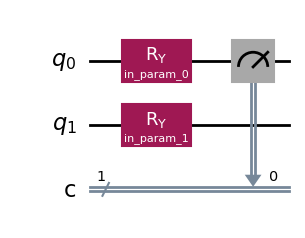

In [4]:
nq = 2
ng = 3
shots = 100
qc = QuantumCircuit(nq, 1)
inunit = EmbedUnit.generate_ry_arcsin_embed_unit("in", nq, 1)
inunit.apply_to_qc(qc)
feed_dict = inunit.feed_dict(1.)
qc.measure(0, 0)
qc.draw("mpl")

sim = AerSimulator()
bc = qc.assign_parameters(feed_dict)
job = transpile(bc, sim)
res = sim.run(job, shots=shots).result().get_counts(bc)
pre = res.get("0", 0) - res.get("1", 0)
print("y:", pre / shots, res)
qc.draw("mpl")